<a href="https://colab.research.google.com/github/Nishin-10/Nishin-10/blob/main/GPA_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import files
import pandas as pd
import io

print("Please upload the 'gpa_iq.xlsx' file:")
uploaded = files.upload()

file_name = 'gpa_iq.xlsx'
if file_name in uploaded:
    df = pd.read_excel(io.BytesIO(uploaded[file_name]))
    print(f"'{file_name}' loaded successfully into a pandas DataFrame.")
    display(df.head())
else:
    print(f"Error: '{file_name}' not found among uploaded files.")

Please upload the 'gpa_iq.xlsx' file:


Saving gpa_iq.xlsx to gpa_iq.xlsx


/tmp/ipython-input-3171885590.py:9: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df = pd.read_excel(uploaded[file_name])


'gpa_iq.xlsx' loaded successfully into a pandas DataFrame.


,obs,gpa,iq,gender,concept
0,1,7.940,111,2,67
1,2,8.292,107,2,43
2,3,4.643,100,2,52
3,4,7.470,107,2,66
4,5,8.882,114,1,58


In [4]:
# Define features (X) and target (y)
X = df[['iq', 'gender', 'concept']]
y = df['gpa']

print("Features (X) head:")
display(X.head())
print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,iq,gender,concept
0,111,2,67
1,107,2,43
2,100,2,52
3,107,2,66
4,114,1,58



Target (y) head:


,gpa
0,7.940
1,8.292
2,4.643
3,7.470
4,8.882


In [5]:
from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Perform one-hot encoding for 'gender' and 'concept' features
X_train_encoded = pd.get_dummies(X_train, columns=['gender', 'concept'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['gender', 'concept'], drop_first=True)

# Ensure columns are aligned between train and test sets after encoding
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Linear regression
lr = LinearRegression()
lr.fit(X_train_encoded, y_train) # Fit with encoded data
y_pred_lr = lr.predict(X_test_encoded) # Predict with encoded data

# Calculate the error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

Linear Regression MSE: 10.802350978234596


In [8]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Instantiate a Lasso regressor with a chosen alpha value (e.g., 0.1)
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the Lasso model to the encoded training data
lasso.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred_lasso = lasso.predict(X_test_encoded)

# Calculate the Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression MSE: {mse_lasso}")

Lasso Regression MSE: 1.1117301906740928


In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Instantiate a Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Fit the Decision Tree model to the encoded training data
dt.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred_dt = dt.predict(X_test_encoded)

# Calculate the Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree Regression MSE: {mse_dt}")

Decision Tree Regression MSE: 3.7634793749999997


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate a Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the Random Forest model to the encoded training data
rf.fit(X_train_encoded, y_train)

# Make predictions on the encoded test data
y_pred_rf = rf.predict(X_test_encoded)

# Calculate the Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Regression MSE: {mse_rf}")

Random Forest Regression MSE: 1.6842887534875048


In [11]:
model_mse = {
    'Linear Regression': mse_lr,
    'Lasso': mse_lasso,
    'Decision Tree': mse_dt,
    'Random Forest': mse_rf
}

# Convert to a Pandas Series for easier handling
mse_series = pd.Series(model_mse)

print("Mean Squared Errors for each model:")
print(mse_series)

Mean Squared Errors for each model:
Linear Regression    10.802351
Lasso                 1.111730
Decision Tree         3.763479
Random Forest         1.684289
dtype: float64


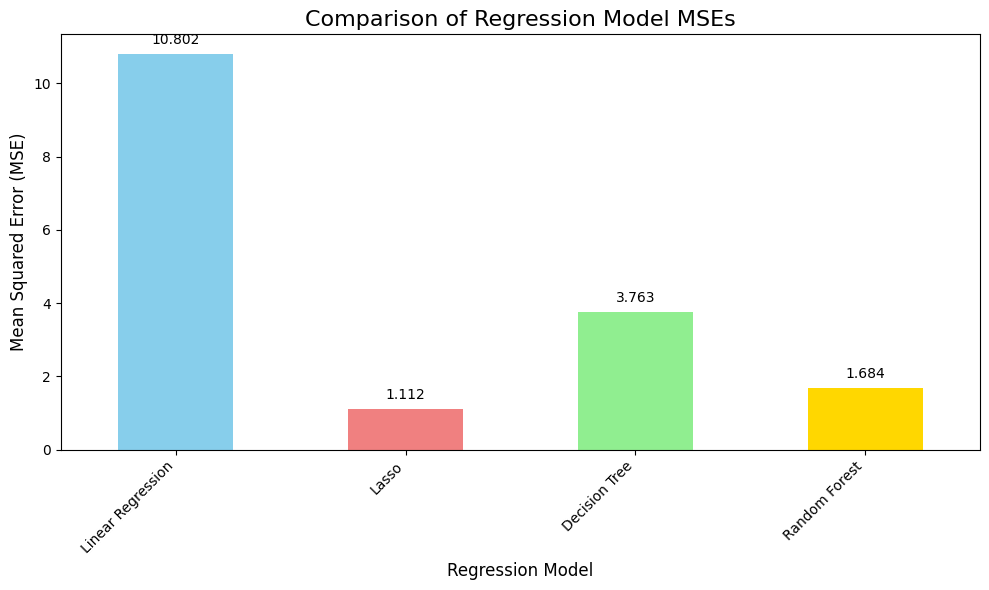

In [12]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = mse_series.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Add title and labels
plt.title('Comparison of Regression Model MSEs', fontsize=16)
plt.xlabel('Regression Model', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Display MSE values on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add a legend if desired (though not strictly necessary for this type of bar plot with clear labels)
# plt.legend(title='Model Type')

plt.tight_layout()
plt.show()


In [17]:
new_row_data = {'obs': df['obs'].max() + 1 if 'obs' in df.columns else 1,
                'iq': 103,
                'gender': 2,
                'concept': 60}

# Create a new DataFrame from the new row data
new_df_row = pd.DataFrame([new_row_data])

# Concatenate the new row to the existing DataFrame
df = pd.concat([df, new_df_row], ignore_index=True)

print("DataFrame after adding the new row:")
display(df.tail())

DataFrame after adding the new row:


,obs,gpa,iq,gender,concept
75,87,6.057,114,2,51
76,88,6.057,93,1,21
77,89,6.938,106,2,56
78,90,8.500,103,2,60
79,91,NaN,103,2,60


In [18]:

prediction_input = pd.DataFrame([new_row_data])[['iq', 'gender', 'concept']]

# Apply one-hot encoding to the new data, similar to X_train and X_test
prediction_input_encoded = pd.get_dummies(prediction_input, columns=['gender', 'concept'], drop_first=True)

prediction_input_aligned = prediction_input_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

if 'lasso' in globals():
    predicted_gpa = lasso.predict(prediction_input_aligned)
    print(f"Predicted GPA for the new data: {predicted_gpa[0]:.2f}")
else:
    print("Error: Lasso model is not defined. Please ensure it has been trained.")

Predicted GPA for the new data: 7.28
